In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
gold_price_dataset = pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_price_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_price_dataset.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [21]:
X = gold_price_dataset.drop(['Date','GLD'],axis=1)
Y = gold_price_dataset['GLD']

In [34]:
model = RandomForestRegressor(n_estimators=100)

In [35]:
scaler = StandardScaler()

In [36]:
X_standard = scaler.fit_transform(X)

In [37]:
Y.head()

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999


In [38]:
X = pd.DataFrame(X_standard, columns=X.columns)
X.head()

,SPX,USO,SLV,EUR/USD
0,-0.399145,2.388810,-0.691720,1.429753
1,-0.399145,2.383687,-0.676912,1.451035
2,-0.467604,2.329381,-0.693553,1.458646
3,-0.458837,2.236652,-0.709630,1.403954
4,-0.508915,2.265342,-0.633900,2.079145


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [40]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [41]:
model.score(X_train, Y_train)

0.9985309877426208

In [42]:
model.score(X_test, Y_test)

0.9889950646217799

In [48]:
X_test_prediction = model.predict(X_test)
score_1 = mean_squared_error(Y_test, X_test_prediction)
score_2 = r2_score(Y_test, X_test_prediction)
print("MSE: ", score_1)
print("R2 score: ", score_2)

MSE:  5.804481640355065
R2 score:  0.9889950646217799


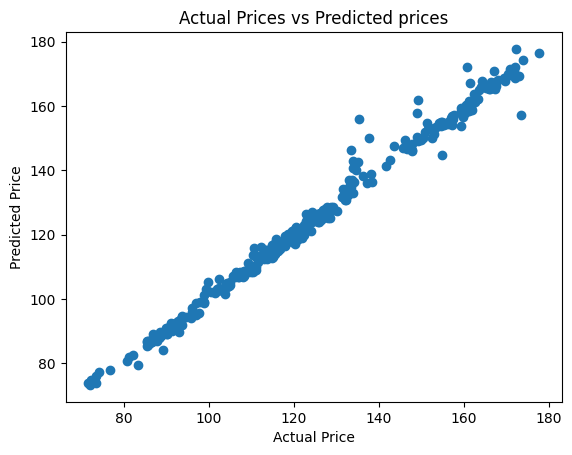

In [49]:
plt.scatter(Y_test, X_test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted prices")
plt.show()